In [34]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)

/home/ashkan/Documents/ML-Basic1/ML-Basic-venv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [68]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

In [69]:
pca.components_.shape

(784, 784)

In [71]:
pca.explained_variance_ratio_[:154].sum()

0.9501960192613033

In [72]:
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum_variance > .95) + 1
d

154

In [73]:
### selection principle components, create projection matrix

n_component = 154
projection_matrix = pca.components_[:n_component].T
projection_matrix.shape

(784, 154)

In [74]:
### transform

X_train_transformed = X_train  @ projection_matrix
X_train_transformed.shape

(60000, 154)

In [75]:
### reverse transform

X_train_recovered = X_train_transformed @ np.linalg.pinv(projection_matrix)

In [76]:
X_train_recovered.shape

(60000, 784)

<Figure size 300x300 with 0 Axes>

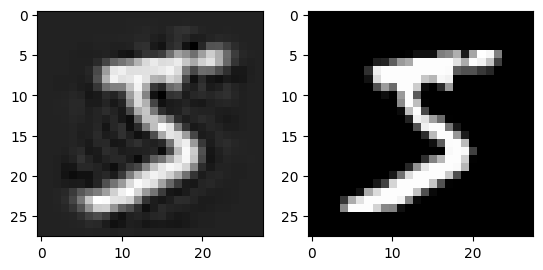

In [77]:
plt.figure(figsize=(3, 3))

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(X_train_recovered[0, :].reshape(28, 28), cmap="gray")
ax1.imshow(X_train[0, :].reshape(28, 28), cmap="gray")

### builtin PCA

In [63]:
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [64]:
pca.n_components_

154

In [65]:
X_train_transformed = pca.transform(X_train)
X_train_transformed.shape

(60000, 154)

In [66]:
X_train_recovered = pca.inverse_transform(X_train_transformed)

<Figure size 300x300 with 0 Axes>

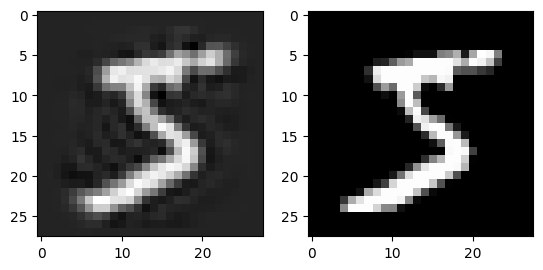

In [67]:
plt.figure(figsize=(3, 3))

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(X_train_recovered[0, :].reshape(28, 28), cmap="gray")
ax1.imshow(X_train[0, :].reshape(28, 28), cmap="gray")

In [117]:
### PCA as preprocessor

from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline


clf = make_pipeline(PCA(n_components=154, random_state=42),
                    RandomForestClassifier(n_estimators=100, random_state=42))

clf.fit(X_train[:1000], y_train[:1000])

Pipeline(steps=[('pca', PCA(n_components=154, random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [118]:
y_predict = clf.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       980
           1       0.94      0.98      0.96      1135
           2       0.83      0.82      0.82      1032
           3       0.81      0.78      0.79      1010
           4       0.74      0.83      0.78       982
           5       0.77      0.66      0.71       892
           6       0.88      0.83      0.86       958
           7       0.85      0.87      0.86      1028
           8       0.81      0.72      0.76       974
           9       0.75      0.78      0.76      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [120]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train[:1000], y_train[:1000])

RandomForestClassifier(random_state=42)

In [121]:
y_predict = rf_model.predict(X_test)

In [122]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.86      0.88      1032
           3       0.93      0.80      0.86      1010
           4       0.84      0.87      0.85       982
           5       0.80      0.85      0.82       892
           6       0.89      0.88      0.89       958
           7       0.87      0.91      0.89      1028
           8       0.90      0.80      0.85       974
           9       0.78      0.86      0.82      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [123]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train # could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

In [132]:
X_mmap1 = np.memmap(filename, dtype="float32", mode="readonly", shape= (20, 784))

In [148]:
offset = 8 * 784 * 20

In [153]:
def read_memmp(filename, shape):
    try:
        count = 0
        while True:
            offset = 8 * shape[0] * (shape[1] * count)
            yield np.memmap(filename, dtype="float32", mode="readonly", shape= shape, offset=offset)
            count += 1
    except:
        return

In [149]:
X_mmap2 = np.memmap(filename, dtype="float32", mode="readonly", shape= (20, 784), offset=offset)

<Figure size 800x800 with 0 Axes>

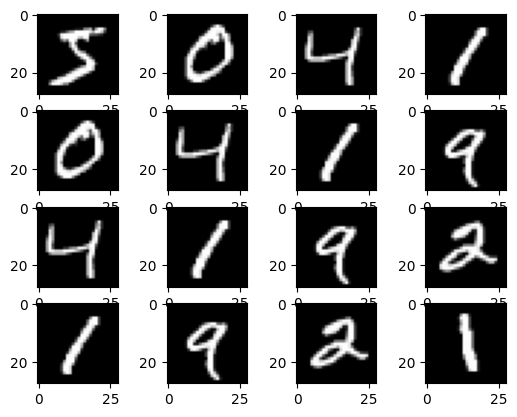

In [150]:
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(4, 4)
def plot_mnist(X_train, ax, i , j):
    ax[i, j ].imshow(X_train.reshape(28, 28), cmap="gray")

for i in range(4):
    for j in range(4):
        plot_mnist(X_mmap1[i+j], ax, i , j)
    

<Figure size 800x800 with 0 Axes>

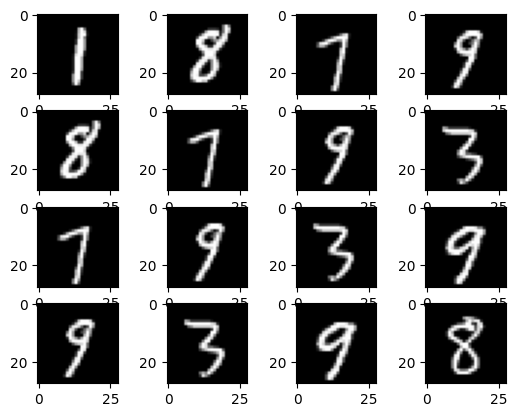

In [151]:
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        plot_mnist(X_mmap2[i+j], ax, i , j)

In [155]:
from sklearn.decomposition import IncrementalPCA

inc_pca = IncrementalPCA(n_components=154)
for batch_sample in read_memmp(filename, (200, 784)):
    inc_pca.partial_fit(batch_sample)

In [158]:
inc_pca.components_.shape

(154, 784)

In [159]:
X_transformed = inc_pca.transform(X_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_transformed, y_train)

RandomForestClassifier(random_state=42)

In [162]:
X_test_transformed = inc_pca.transform(X_test)

print(classification_report(y_test, rf_model.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.94      0.93      0.94       892
           6       0.96      0.98      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

